In [12]:
#import
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from scipy import sparse




In [ ]:
import numpy as np                                       ## 기초 수학 연산 및 행렬계산
import pandas as pd                                      ## 데이터프레임 사용
from sklearn import datasets                             ## iris와 같은 내장 데이터 사용
from sklearn.model_selection import train_test_split     ## train, test 데이터 분할

from sklearn.linear_model import LinearRegression        ## 선형 회귀분석
from sklearn.linear_model import LogisticRegression      ## 로지스틱 회귀분석
from sklearn.naive_bayes import GaussianNB               ## 나이브 베이즈
from sklearn import svm                                  ## 서포트 벡터 머신
from sklearn import tree                                 ## 의사결정나무
from sklearn.ensemble import RandomForestClassifier      ## 랜덤포레스트

import matplotlib.pyplot as plt                          ## plot 그릴때 사용

C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second Feature')

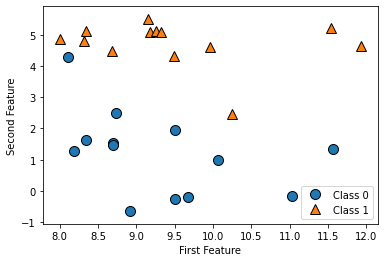

In [13]:
#Forge DataSet
X, y = mglearn.datasets.make_forge()
#print(X,y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

Text(0, 0.5, 'Target')

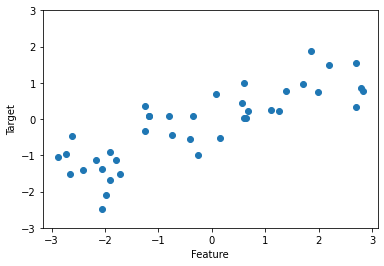

In [23]:
#Wave DataSet
X, y = mglearn.datasets.make_wave(n_samples=40)
#print(X,y)

plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print("데이터 형태:",cancer.data.shape)
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
데이터 형태: (569, 30)
{'malignant': 212, 'benign': 357}


In [45]:
#boston DataSet
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print(boston.DESCR)
print("Data Shape: \n",boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [54]:
#KNN K-최근접 이웃 분류
#mglearn.plots.plot_knn_classification()

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
#print(X,y)
X_train, X_tset, y_train, y_test = train_test_split(X,y,random_state=0)

#모델 제작

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

print("예측 데이터",clf.predict(X_tset))
print("테스트 정확도: {:.2f}".format(clf.score(X_tset,y_test)))

예측 데이터 [1 0 1 0 1 0 0]
테스트 정확도: 0.86


C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


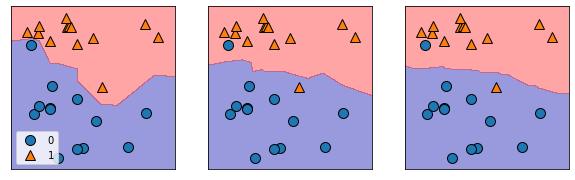

In [85]:
#결정 경계그리기

fig, axes = plt.subplots(1,3,figsize=(10,3)) #여러 그래프 그리기

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True,ax=ax,eps=0.5,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
axes[0].legend(loc=3)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


Text(0, 0.5, 'Accuracy')

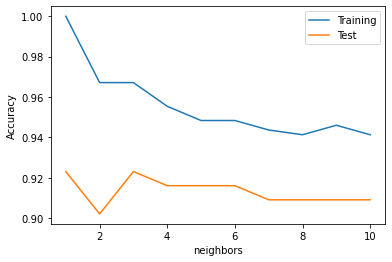

In [116]:
#유방암 데이터셋
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state = 66)

neighbors_setting = range(1,11)
training_accuracy = []
test_accuracy = []

#KNN neighbors 갯수에 따라 학습
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

#시각화
plt.plot(neighbors_setting,training_accuracy,label="Training")
plt.plot(neighbors_setting, test_accuracy,label="Test")
plt.legend()
plt.xlabel("neighbors")
plt.ylabel("Accuracy")



In [124]:
#KNN 회기 Wave DataSet
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

print("Accuracy: ",reg.score(X_test,y_test))


Accuracy:  0.8344172446249605
